# MNIST - Simple CNNs using Keras

### Import packages

In [2]:
# https://keras.io/
!pip install -q keras

#https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard
!pip install -q tensorboard

import keras
import tensorflow as tf
import numpy as np

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

/home/ssk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
print tf.__version__

1.6.0


In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14299417612984319039
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1505230848
locality {
  bus_id: 1
}
incarnation: 8609415644783001108
physical_device_desc: "device: 0, name: GeForce GT 755M, pci bus id: 0000:01:00.0, compute capability: 3.0"
]


In [9]:
print keras.__version__

2.1.5


### Load pre-shuffled MNIST data into train and test sets

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


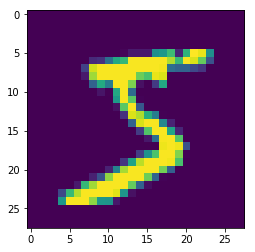

In [12]:
# Display a sample

%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
print y_train[0]

### Training and Test data prepration

In [13]:
# Add channel - Reshape
# (60000, 28, 28) => (60000, 28, 28, 1),
# (10000, 28, 28) => (10000, 28, 28, 1)

print (x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
print (x_train.shape)

print (x_test.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
print (x_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28)
(10000, 28, 28, 1)


In [14]:
#Normalize Inputs
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
X_train = x_train/255
X_test = x_test/255

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.np_utils.to_categorical(y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [17]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [18]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print num_pixels

784


In [19]:
num_classes = Y_train.shape[1]
print num_classes

10


## Tensorflow setup

In [4]:
import tensorflow as tf
run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

In [5]:
#Tensor Board
from keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

### Monitoring progress with Tensor Board
Now that you have a tensorboard instance hooked up you can start to monitor the program by executing the following command in a separate terminal:

```tensorboard --logdir=logs/```

## 1 of 4) CNN Model - Orginal

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(10, (1, 1), activation='relu'))
model.add(keras.layers.Conv2D(num_classes, 26))
model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             options=run_opts)

In [19]:
#Train
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2003 - acc: 0.9430
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0753 - acc: 0.9780
Epoch 3/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0580 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0467 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0382 - acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0316 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0252 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0202 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0161 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0134 - acc

In [20]:
#Evaluate
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)
print model.metrics_names

10000/10000 [==============================] - 8s 769us/step
[0.0901504402341583, 0.9795]
['loss', 'acc']


## 2 of 4) Custom CNN Model - #1

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(10, (1, 1), activation='relu'))
model.add(keras.layers.Conv2D(num_classes, 13))
model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          16910     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 17,560
Trainable params: 17,560
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             options=run_opts)

In [ ]:
#Train
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2612 - acc: 0.9232
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0983 - acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0761 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0634 - acc: 0.9811
Epoch 5/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0549 - acc: 0.9824
Epoch 6/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0477 - acc: 0.9851
Epoch 7/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0414 - acc: 0.9867
Epoch 8/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0364 - acc: 0.9885
Epoch 9/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0320 - acc: 0.9899
Epoch 10/10
 4288/60000 [=>............................] - ETA: 1:38 - loss: 0.0234 - acc: 0.9928

In [ ]:
#Evaluate
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)
print model.metrics_names

## 3 of 4) Custom CNN Model - #2

In [17]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(10, (1, 1), activation='relu'))
model.add(keras.layers.Conv2D(num_classes, 5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 10)          330       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 10)          2510      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [18]:
#Compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             options=run_opts)

In [19]:
#Train
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.2289 - acc: 0.9289
Epoch 2/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0754 - acc: 0.9778
Epoch 3/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.0598 - acc: 0.9816
Epoch 4/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0508 - acc: 0.9844
Epoch 5/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0443 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0396 - acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0359 - acc: 0.9888
Epoch 8/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0323 - acc: 0.9899
Epoch 9/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0300 - acc: 0.9911
Epoch 10/10
60000/60000 [==============================] - 23s 377us/step - loss: 

In [20]:
#Evaluate
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)
print model.metrics_names

10000/10000 [==============================] - 2s 152us/step
[0.03917756944763533, 0.9886]
['loss', 'acc']


## 4 of 4) Custom CNN Model - #3

In [21]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(10, (1, 1), activation='relu'))
model.add(keras.layers.Conv2D(num_classes, 5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 10)          170       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 10)          2510      
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
__________

In [22]:
#Compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             options=run_opts)

In [23]:
#Train
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.2444 - acc: 0.9276
Epoch 2/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0862 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0663 - acc: 0.9798
Epoch 4/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0547 - acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0485 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0429 - acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0380 - acc: 0.9875
Epoch 8/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0362 - acc: 0.9883
Epoch 9/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0325 - acc: 0.9896
Epoch 10/10
60000/60000 [==============================] - 23s 378us/step - loss: 

In [1]:
#Evaluate
score = model.evaluate(X_test, Y_test, verbose=1)
print zip(model.metrics_names, score)

NameError: name 'model' is not defined

## 4 of 4) Custom CNN Model - #3

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(512,  activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Dense(num_classes, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 28, 28, 512)       1024      
_________________________________________________________________
dense_3 (Dense)              (None, 28, 28, 10)        5130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)              0         
_________________________________________________________________
activation_1 (Activation)    (None, 7840)              0         
Total params: 6,154
Trainable params: 6,154
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(10, (1, 1), activation='relu'))
model.add(keras.layers.Conv2D(10, 5, activation='relu'))

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 5, 5, 10)          330       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 1, 10)          2510      
_________________________________________________________________
dense_12 (Dense)             (None, 1, 1, 512)         5632      
__________

In [22]:
#Compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             options=run_opts)

In [23]:
#Train
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.9790 - acc: 0.6266
Epoch 2/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.7849 - acc: 0.6765
Epoch 3/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.7648 - acc: 0.6814
Epoch 4/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.7554 - acc: 0.6834
Epoch 5/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.7487 - acc: 0.6853
Epoch 6/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.7442 - acc: 0.6862
Epoch 7/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.7402 - acc: 0.6871
Epoch 8/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.7373 - acc: 0.6873
Epoch 9/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.7363 - acc: 0.6877
Epoch 10/10
60000/60000 [==============================] - 24s 395us/step - loss: 

In [24]:
#Evaluate
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)
print model.metrics_names

10000/10000 [==============================] - 1s 135us/step
[0.7379497566223144, 0.6876]
['loss', 'acc']
